# PCA

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.decomposition as skd
import seaborn as sns

In [3]:
df = pd.read_csv('data/cleaned_data.csv')

<AxesSubplot: >

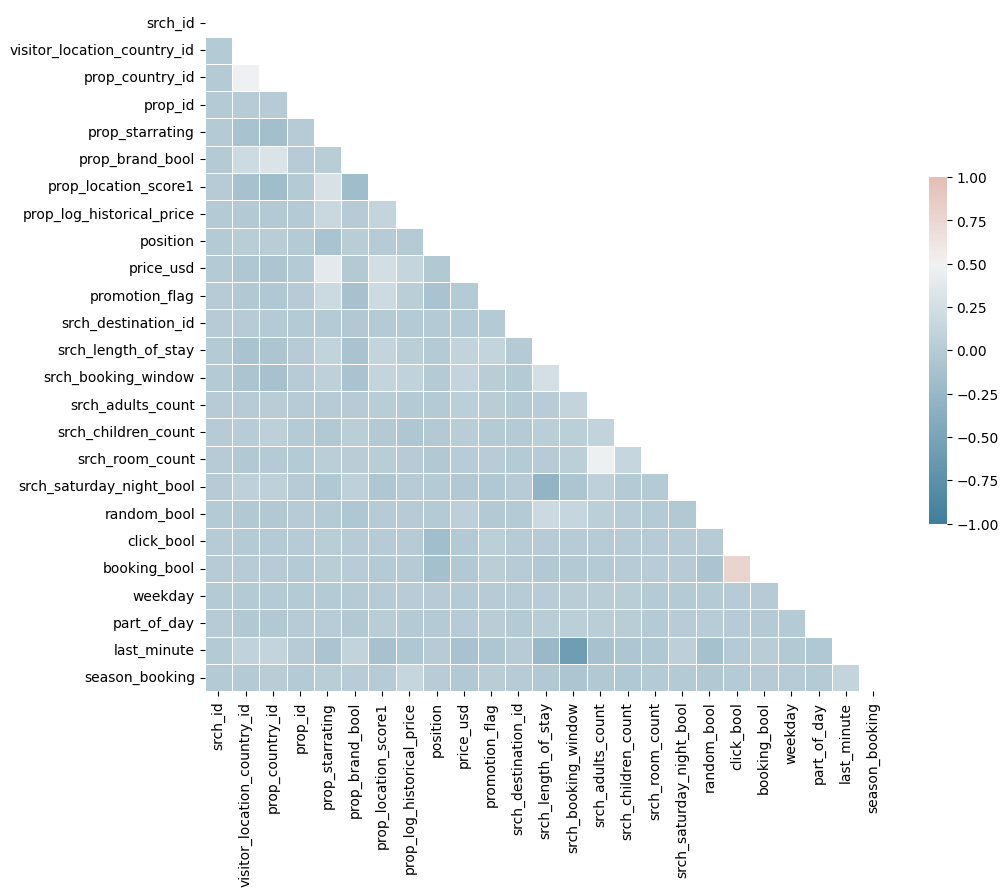

In [5]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
len(corr_matrix)

25

In [8]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [16]:
n = 25
pca = skd.PCA(n_components=n)
df_pca = pca.fit_transform(normalized_df)

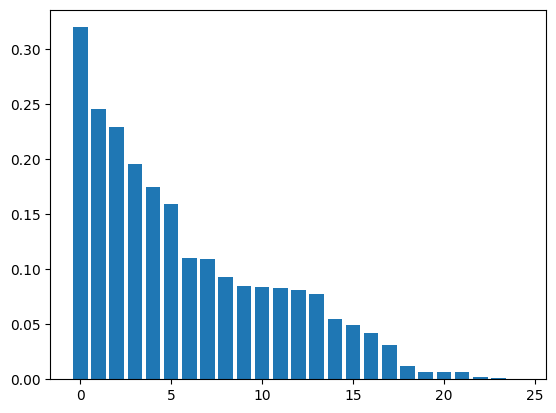

In [17]:
plt.bar(range(0,len(pca.explained_variance_)), pca.explained_variance_)
plt.show()

In [18]:
loadings = pca.components_.T
loadings_column = [f'PC{i}' for i in range(n)]
df_loadings = pd.DataFrame(loadings, columns=loadings_column, index=normalized_df.columns)

[Text(0, 0.5, 'PC0'),
 Text(0, 1.5, 'PC1'),
 Text(0, 2.5, 'PC2'),
 Text(0, 3.5, 'PC3'),
 Text(0, 4.5, 'PC4'),
 Text(0, 5.5, 'PC5'),
 Text(0, 6.5, 'PC6'),
 Text(0, 7.5, 'PC7'),
 Text(0, 8.5, 'PC8'),
 Text(0, 9.5, 'PC9'),
 Text(0, 10.5, 'PC10'),
 Text(0, 11.5, 'PC11'),
 Text(0, 12.5, 'PC12'),
 Text(0, 13.5, 'PC13'),
 Text(0, 14.5, 'PC14'),
 Text(0, 15.5, 'PC15'),
 Text(0, 16.5, 'PC16'),
 Text(0, 17.5, 'PC17'),
 Text(0, 18.5, 'PC18'),
 Text(0, 19.5, 'PC19'),
 Text(0, 20.5, 'PC20'),
 Text(0, 21.5, 'PC21'),
 Text(0, 22.5, 'PC22'),
 Text(0, 23.5, 'PC23'),
 Text(0, 24.5, 'PC24')]

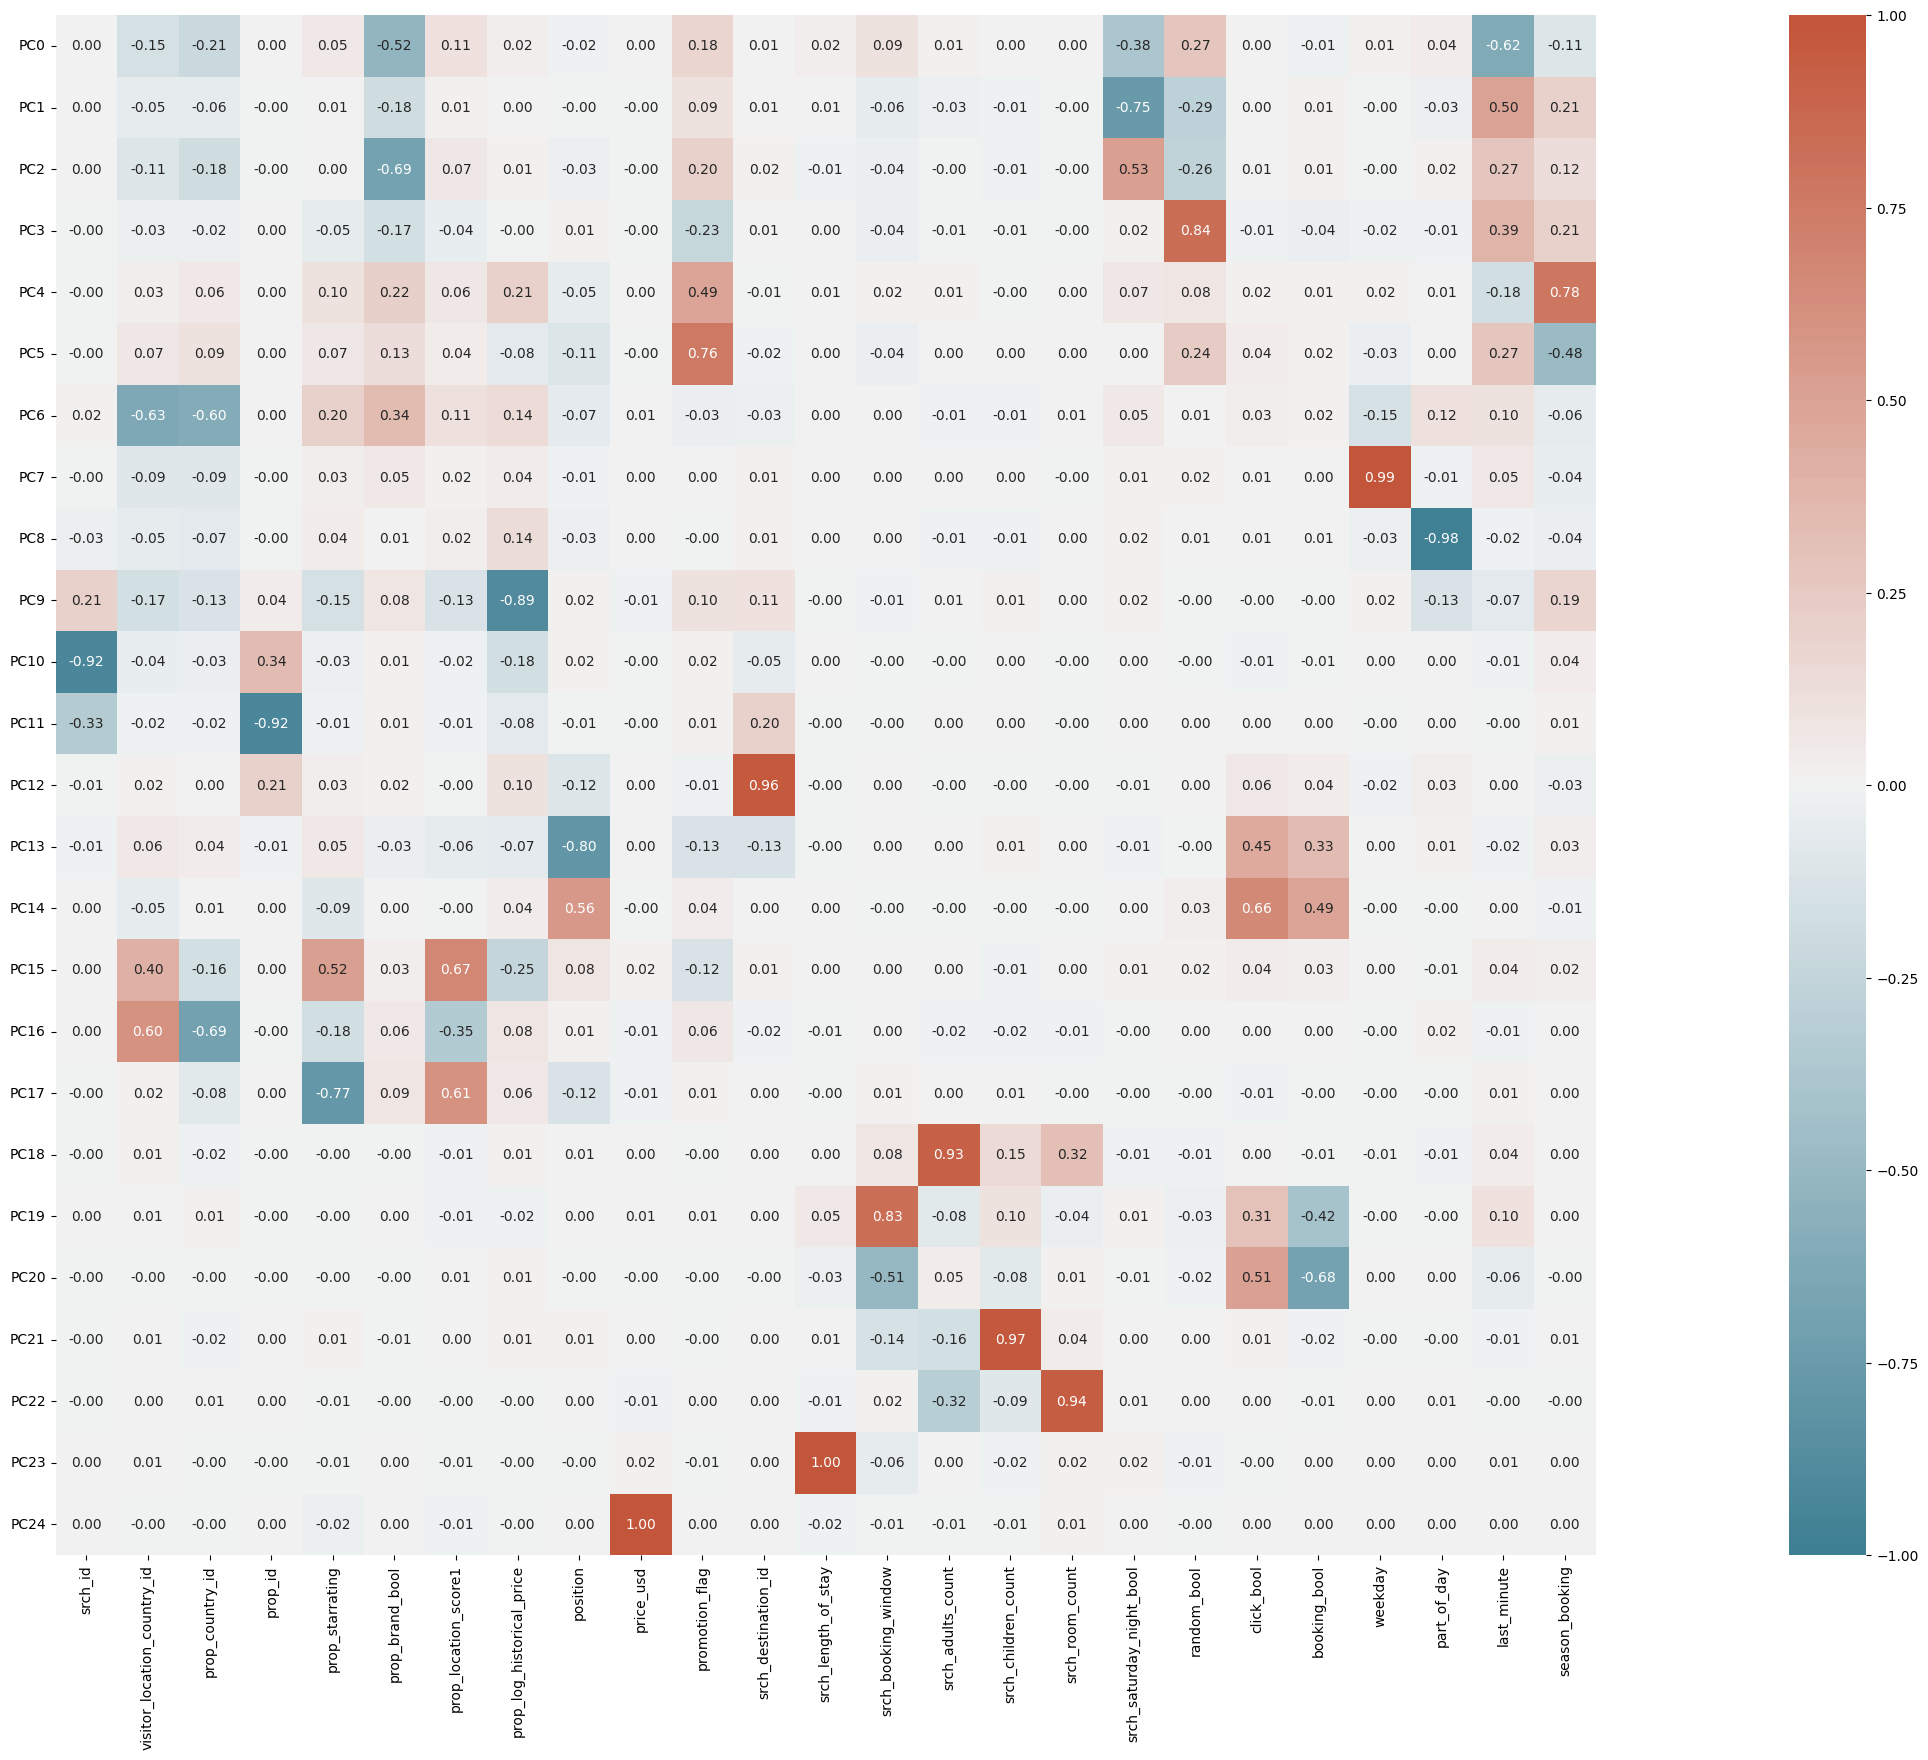

In [20]:
plt.figure(figsize=(50,20))

# plot the heatmap for correlation matrix
ax = sns.heatmap(df_loadings.T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)